In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
#Checking for missing values
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [7]:
len(df)

20800

In [8]:
#Removing the missing values
df.dropna(inplace= True)

In [10]:
len(df)

18285

In [11]:
#mapping the label data, 0 means reliable while 1 means unreliable
label_map = {
    0: "Real News",
    1: "Fake News"
}

df['label'] = df['label'].map(label_map)

In [12]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Fake News
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,Real News
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Fake News
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Fake News
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Fake News


In [13]:
#Chencking for data imbalance of the target variable
df['label'].value_counts()

Real News    10361
Fake News     7924
Name: label, dtype: int64

In [14]:
#How many authors are there
df['author'].nunique()

3838

In [15]:
df['author'].value_counts().tail(100)

Adoriasoft                                                  1
Pavel Tarasenko                                             1
Floyd Whaley and Ian Austen                                 1
Simon Romero and Daniel Politi                              1
Richard Rubin                                               1
                                                           ..
doucyet                                                     1
Victoria Burnett, Randal C. Archibold and Frances Robles    1
Mark Mazzetti and Scott Shane                               1
Gandalf77                                                   1
Declan Walsh, Nour Youssef and Kareem Fahim                 1
Name: author, Length: 100, dtype: int64

In [17]:
#Using the author feature is not feasible. This is because when we divide the data into a training and testing set, there is
#going to be some operational problems due to the fact some Authors only occur once in the dataset. The ones which fall in the
#training set would cause overfitting while the ones who fall on the testing set would cause operational problems

In [18]:
#Dropping the author feature
df.drop('author', axis=1, inplace=True)

In [19]:
df.head()

,id,title,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,Fake News
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,Real News
2,2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",Fake News
3,3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,Fake News
4,4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,Fake News


In [20]:
#The id column is of no relevance
df.drop('id', axis=1, inplace=True)

In [21]:
df.head()

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,Fake News
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,Real News
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",Fake News
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,Fake News
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,Fake News


In [22]:
#The title of the news is pretty much explained in the text,so there is no need keeping the title variable
df.drop('title',axis=1, inplace=True)

In [23]:
df.head()

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Fake News
1,Ever get the feeling your life circles the rou...,Real News
2,"Why the Truth Might Get You Fired October 29, ...",Fake News
3,Videos 15 Civilians Killed In Single US Airstr...,Fake News
4,Print \nAn Iranian woman has been sentenced to...,Fake News


In [27]:
#Cleaning up the text

#1) Removing Punctuations
#2) Removing extra white spaces which occurs as a result of the initial removal of punctuations
#3) Removing stopwords
#4) Stemming the words which converts the word to its original form

In [30]:
first_text = df['text'].iloc[0]

In [40]:
#REMOVING PUNCUTAIONS AND EXTRA WHITE SPACES
import string
punctuations = string.punctuation.split()

In [41]:
punc = '’'
punctuations.append(punc)

In [43]:
punctuations = ''.join(punctuations)

In [44]:
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~’'

In [45]:
text1 = [char for char in first_text if char not in punctuations]

In [46]:
text1

['H',
 'o',
 'u',
 's',
 'e',
 ' ',
 'D',
 'e',
 'm',
 ' ',
 'A',
 'i',
 'd',
 'e',
 ' ',
 'W',
 'e',
 ' ',
 'D',
 'i',
 'd',
 'n',
 't',
 ' ',
 'E',
 'v',
 'e',
 'n',
 ' ',
 'S',
 'e',
 'e',
 ' ',
 'C',
 'o',
 'm',
 'e',
 'y',
 's',
 ' ',
 'L',
 'e',
 't',
 't',
 'e',
 'r',
 ' ',
 'U',
 'n',
 't',
 'i',
 'l',
 ' ',
 'J',
 'a',
 's',
 'o',
 'n',
 ' ',
 'C',
 'h',
 'a',
 'f',
 'f',
 'e',
 't',
 'z',
 ' ',
 'T',
 'w',
 'e',
 'e',
 't',
 'e',
 'd',
 ' ',
 'I',
 't',
 ' ',
 'B',
 'y',
 ' ',
 'D',
 'a',
 'r',
 'r',
 'e',
 'l',
 'l',
 ' ',
 'L',
 'u',
 'c',
 'u',
 's',
 ' ',
 'o',
 'n',
 ' ',
 'O',
 'c',
 't',
 'o',
 'b',
 'e',
 'r',
 ' ',
 '3',
 '0',
 ' ',
 '2',
 '0',
 '1',
 '6',
 ' ',
 'S',
 'u',
 'b',
 's',
 'c',
 'r',
 'i',
 'b',
 'e',
 ' ',
 'J',
 'a',
 's',
 'o',
 'n',
 ' ',
 'C',
 'h',
 'a',
 'f',
 'f',
 'e',
 't',
 'z',
 ' ',
 'o',
 'n',
 ' ',
 't',
 'h',
 'e',
 ' ',
 's',
 't',
 'u',
 'm',
 'p',
 ' ',
 'i',
 'n',
 ' ',
 'A',
 'm',
 'e',
 'r',
 'i',
 'c',
 'a',
 'n',
 ' ',
 'F',
 'o'

In [47]:
text2 = ''.join(text1)
text2

'House Dem Aide We Didnt Even See Comeys Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30 2016 Subscribe Jason Chaffetz on the stump in American Fork Utah  image courtesy Michael Jolley available under a Creative CommonsBY license \nWith apologies to Keith Olbermann there is no doubt who the Worst Person in The World is this week–FBI Director James Comey But according to a House Democratic aide it looks like we also know who the secondworst person is as well It turns out that when Comey sent his nowinfamous letter announcing that the FBI was looking into emails that may be related to Hillary Clintons email server the ranking Democrats on the relevant committees didnt hear about it from Comey They found out via a tweet from one of the Republican committee chairmen \nAs we now know Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence Judiciary and Oversight committees that his agency was reviewing emails it had recently disc

In [49]:
def cleaning_text(text):
    #Changing all texts into lower case
    text = text.lower()
    #Removing punctuations
    punctuations = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~’”—'
    text = [char for char in text if char not in punctuations]
    text = ''.join(text)
    #Removing extra white spaces
    text = ' '.join(text.split())
    return text

In [50]:
df['text'] = df['text'].apply(cleaning_text)

In [51]:
df.head()

,text,label
0,house dem aide we didnt even see comeys letter...,Fake News
1,ever get the feeling your life circles the rou...,Real News
2,why the truth might get you fired october 29 2...,Fake News
3,videos 15 civilians killed in single us airstr...,Fake News
4,print an iranian woman has been sentenced to s...,Fake News


In [61]:
from nltk.corpus import stopwords

In [62]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [63]:
#Removing punctuations from the stopwords to make it uniform
stopwords = stopwords.words('english')
stopwords = ' '.join(stopwords)
stopwords = [char for char in stopwords if char not in string.punctuation]
stopwords = ''.join(stopwords)
stopwords = stopwords.split()
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'youre',
 'youve',
 'youll',
 'youd',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'shes',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'thatll',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'fe

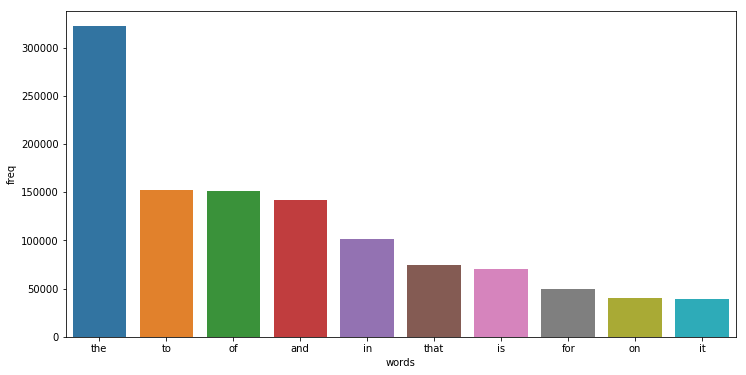

In [66]:
#The top 10 most common words throughout the entire dataset by each label
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
words = cv.fit_transform(df[df['label'] == 'Fake News']['text'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0,i]) for word,i in cv.vocabulary_.items()]

words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
freq = pd.DataFrame(words_freq, columns=['words','freq'])

top_20 = freq.head(20)
plt.figure(figsize=(12,6))
sns.barplot(x='words',y='freq',data=top_20)

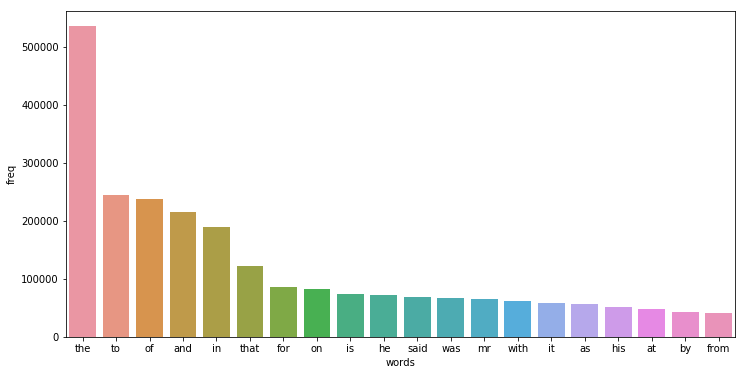

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
words = cv.fit_transform(df[df['label'] == 'Real News']['text'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0,i]) for word,i in cv.vocabulary_.items()]

words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
freq = pd.DataFrame(words_freq, columns=['words','freq'])

top_20 = freq.head(20)
plt.figure(figsize=(12,6))
sns.barplot(x='words',y='freq',data=top_20)

In [70]:
#The stopwords are the most frequently occuring words as usual
#Stop words add no benefits when building models
def removing_stopwords(text):
    from nltk.corpus import stopwords
    stopwords = stopwords.words('english')
    stopwords = ' '.join(stopwords)
    stopwords = [char for char in stopwords if char not in string.punctuation]
    stopwords = ''.join(stopwords)
    stopwords = stopwords.split()
    text = text.split()
    text = [word for word in text if word not in stopwords]
    text = ' '.join(text)
    return text

In [71]:
df['text'] = df['text'].apply(removing_stopwords)

In [72]:
df.head()

,text,label
0,house dem aide even see comeys letter jason ch...,Fake News
1,ever get feeling life circles roundabout rathe...,Real News
2,truth might get fired october 29 2016 tension ...,Fake News
3,videos 15 civilians killed single us airstrike...,Fake News
4,print iranian woman sentenced six years prison...,Fake News


In [75]:
#STEMMINGOR LEMMATIZATION
def stemming(text):
    from nltk.stem.porter import PorterStemmer
    p_stemmer = PorterStemmer()
    text = text.split()
    text = [p_stemmer.stem(word) for word in text]
    text = ' '.join(text)
    return text

In [76]:
df['text'] = df['text'].apply(stemming)

In [77]:
df.head()

,text,label
0,hous dem aid even see comey letter jason chaff...,Fake News
1,ever get feel life circl roundabout rather hea...,Real News
2,truth might get fire octob 29 2016 tension int...,Fake News
3,video 15 civilian kill singl us airstrik ident...,Fake News
4,print iranian woman sentenc six year prison ir...,Fake News


In [83]:
#Checking for empty string tweets
blanks = []
for i,lb,text in df.itertuples():
    if type(text) == str:
        if text == '':
            blanks.append(i)
            
blanks

[]

In [84]:
blanks = []
for i,lb,text in df.itertuples():
    if type(text) == str:
        if text.isspace():
            blanks.append(i)
            
blanks

[]

In [78]:
#MODEL DEVELOPMENT
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [81]:
df['label'].value_counts()/len(df)*100

Real News    56.663932
Fake News    43.336068
Name: label, dtype: float64

In [82]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
bayes_pipeline = Pipeline([
    ('Tfidf Vectorization', TfidfVectorizer()),
    ('Naive Bayes Classifier', MultinomialNB())
])

In [86]:
bayes_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Tfidf Vectorization', TfidfVectorizer()),
                ('Naive Bayes Classifier', MultinomialNB())])

In [87]:
bayes_pred = bayes_pipeline.predict(X_test)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [89]:
print(classification_report(y_test, bayes_pred))
print('\n')
print(confusion_matrix(y_test, bayes_pred))
print('\n')
print(accuracy_score(y_test, bayes_pred))

              precision    recall  f1-score   support

   Fake News       1.00      0.38      0.56      1575
   Real News       0.68      1.00      0.81      2082

    accuracy                           0.73      3657
   macro avg       0.84      0.69      0.68      3657
weighted avg       0.82      0.73      0.70      3657



[[ 606  969]
 [   1 2081]]


0.7347552638774952


In [90]:
svc_pipeline = Pipeline([
    ('Tfidf Vectorization', TfidfVectorizer()),
    ('Support Vector Classifier', LinearSVC())
])

In [91]:
svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Tfidf Vectorization', TfidfVectorizer()),
                ('Support Vector Classifier', LinearSVC())])

In [92]:
svc_pred = svc_pipeline.predict(X_test)

In [93]:
print(classification_report(y_test, svc_pred))
print('\n')
print(confusion_matrix(y_test, svc_pred))
print('\n')
print(accuracy_score(y_test, svc_pred))

              precision    recall  f1-score   support

   Fake News       0.96      0.95      0.95      1575
   Real News       0.96      0.97      0.97      2082

    accuracy                           0.96      3657
   macro avg       0.96      0.96      0.96      3657
weighted avg       0.96      0.96      0.96      3657



[[1500   75]
 [  70 2012]]


0.9603500136724091


In [94]:
#The Linear Support Vector Classifier performs way better than the Naive Bayes Classifier

In [ ]:
#DONE WITH THE MACHINE LEARNING PART AND OVER TO THE DEEP LEARNING PART